In [21]:
import sys
import os
from pathlib import Path

# Add the project root directory to the Python path
project_root = Path().absolute().parent
sys.path.append(str(project_root))

print(f"Added {project_root} to Python path")
print(f"Python path now includes: {sys.path[-1]}")


Added d:\Personal Projects\TENx\Week8\code\Fraud_Detection_For_Ecommerce_and_Banking to Python path
Python path now includes: d:\Personal Projects\TENx\Week8\code\Fraud_Detection_For_Ecommerce_and_Banking


In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from src.utils.data_cleaning import handle_missing_values, remove_duplicates, correct_data_types
from src.utils.eda import plot_univariate_distribution, plot_bivariate_relationship, summary_statistics
from src.utils.feature_engineering import (
    ip_to_int, add_ip_integer_column, merge_ip_to_country, 
    add_time_features, add_transaction_frequency
)
from src.utils.data_transformation import (
    handle_class_imbalance, scale_features, encode_categorical_features
)


In [23]:
# Load datasets - TODO: Adjust file paths to match your data location
fraud_data_path = '../data/raw/Fraud_Data.csv'
ip_map_path = '../data/raw/IpAddress_to_Country.csv'
credit_data_path = '../data/raw/creditcard.csv'

# Load the main fraud dataset
fraud_df = pd.read_csv(fraud_data_path)
ip_map_df = pd.read_csv(ip_map_path)

print(f"Fraud data shape: {fraud_df.shape}")
print(f"IP mapping data shape: {ip_map_df.shape}")
print("\nFraud data columns:", fraud_df.columns.tolist())
print("IP mapping columns:", ip_map_df.columns.tolist())


Fraud data shape: (151112, 11)
IP mapping data shape: (138846, 3)

Fraud data columns: ['user_id', 'signup_time', 'purchase_time', 'purchase_value', 'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class']
IP mapping columns: ['lower_bound_ip_address', 'upper_bound_ip_address', 'country']


In [24]:
# Quick data overview
print("=== INITIAL DATA EXPLORATION ===")
print("Fraud data info:")
print(fraud_df.info())
print("\nMissing values:")
print(fraud_df.isnull().sum())
print("\nFirst few rows:")
print(fraud_df.head())


=== INITIAL DATA EXPLORATION ===
Fraud data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB
None

Missing values:
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex             

In [25]:
# Define missing value strategies for each column
# TODO: Adjust these strategies based on your actual data and domain knowledge
missing_strategy = {
    'age': 'median',        # Fill age with median (common for numerical data)
    'browser': 'mode',      # Fill browser with most common value
    # Add more columns as needed based on your data
    # 'column_name': 'mean'/'median'/'mode'/'drop'
}

# Apply missing value handling
fraud_df_clean = handle_missing_values(fraud_df, missing_strategy)

print("After handling missing values:")
print(f"Shape: {fraud_df_clean.shape}")
print("Missing values remaining:")
print(fraud_df_clean.isnull().sum())


After handling missing values:
Shape: (151112, 11)
Missing values remaining:
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64


In [26]:
# Remove duplicates
fraud_df_clean = remove_duplicates(fraud_df_clean)
print(f"After removing duplicates: {fraud_df_clean.shape}")

# Correct data types
# TODO: Adjust these based on your actual column names and types needed
dtype_dict = {
    'signup_time': 'datetime64[ns]',
    'purchase_time': 'datetime64[ns]',
    'age': 'int',
    'purchase_value': 'float',
    'class': 'int',
    # Add more columns as needed
}

fraud_df_clean = correct_data_types(fraud_df_clean, dtype_dict)

print("\nData types after correction:")
print(fraud_df_clean.dtypes)


After removing duplicates: (151112, 11)

Data types after correction:
user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value           float64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address               float64
class                      int64
dtype: object


=== UNIVARIATE ANALYSIS ===


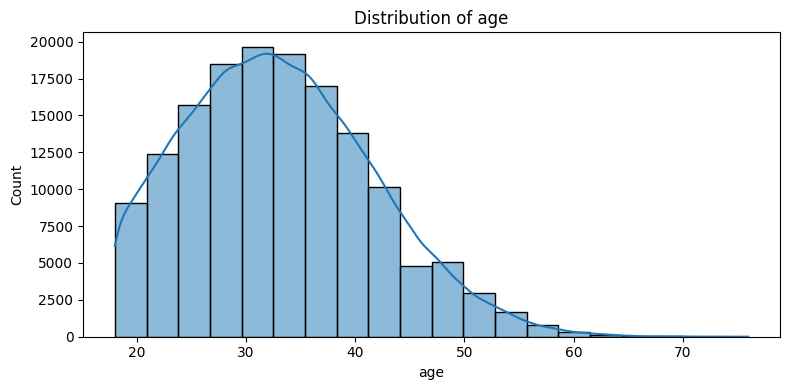

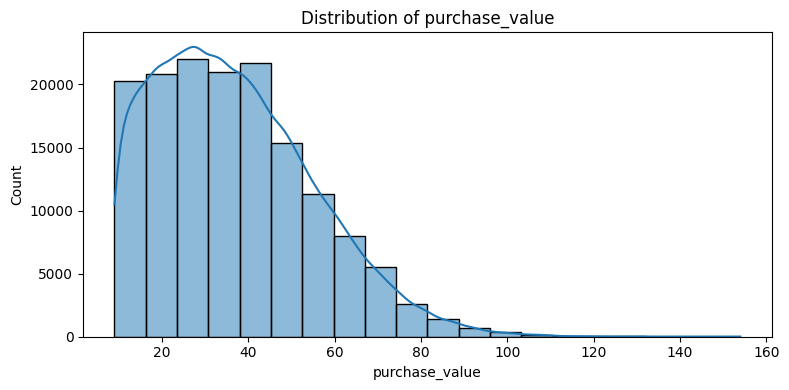

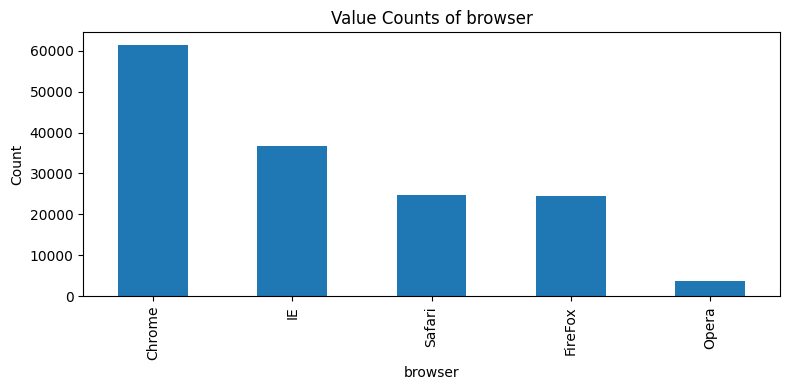

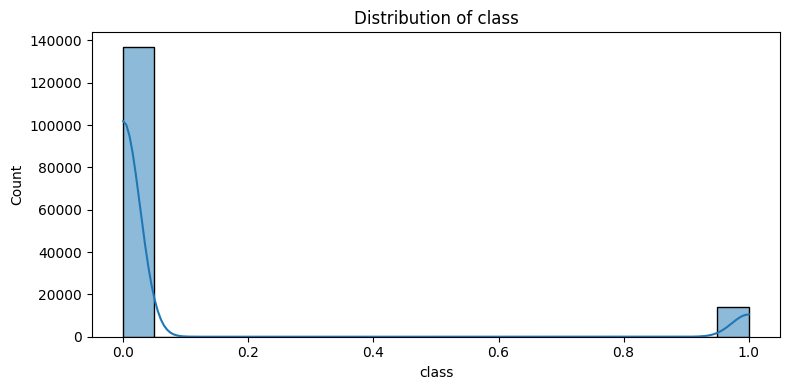

In [27]:
# Univariate analysis - distribution of individual features
print("=== UNIVARIATE ANALYSIS ===")

# TODO: Adjust column names based on your data
plot_univariate_distribution(fraud_df_clean, 'age')
plot_univariate_distribution(fraud_df_clean, 'purchase_value')
plot_univariate_distribution(fraud_df_clean, 'browser')
plot_univariate_distribution(fraud_df_clean, 'class')  # Target variable


=== BIVARIATE ANALYSIS ===


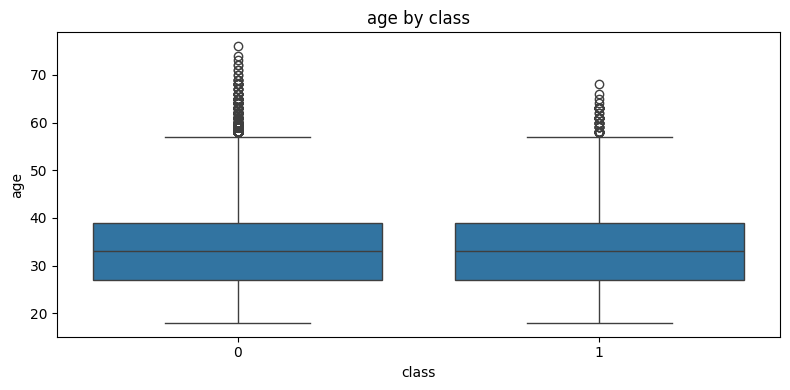

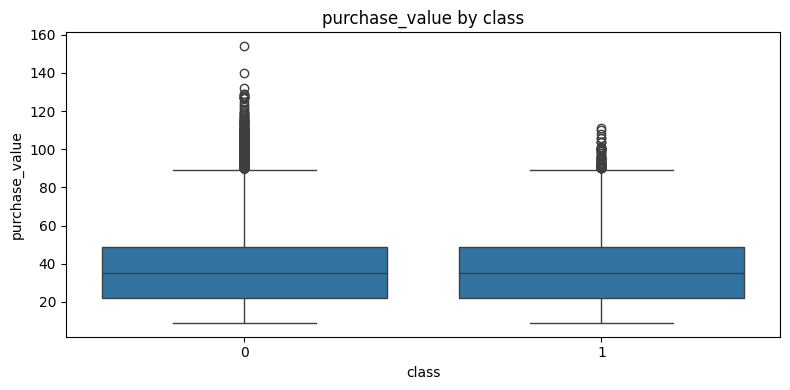

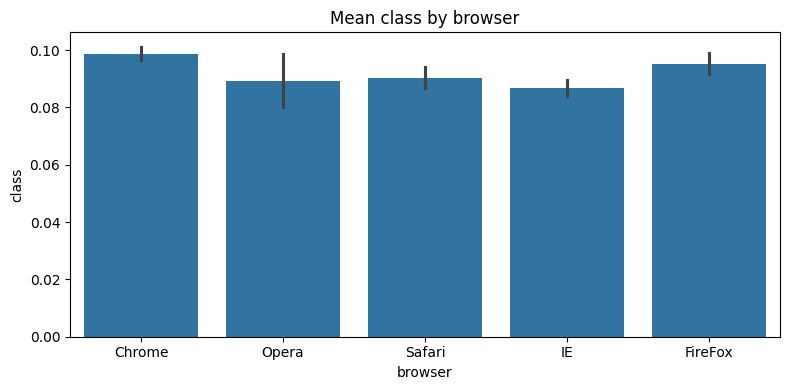

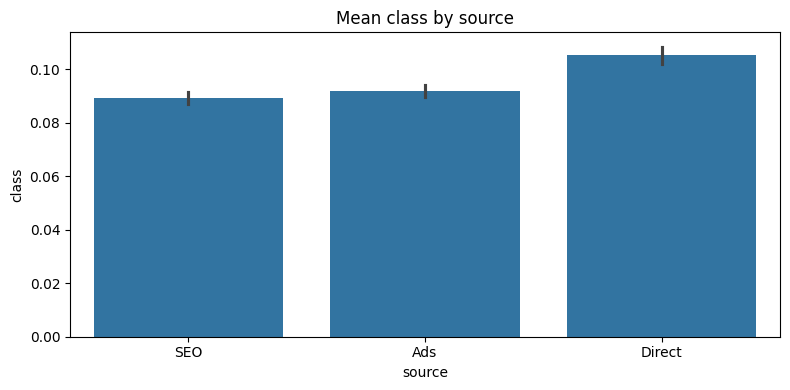

In [28]:
# Bivariate analysis - relationship between features and target
print("=== BIVARIATE ANALYSIS ===")

# TODO: Adjust column names based on your data
plot_bivariate_relationship(fraud_df_clean, 'age', 'class')
plot_bivariate_relationship(fraud_df_clean, 'purchase_value', 'class')
plot_bivariate_relationship(fraud_df_clean, 'browser', 'class')
plot_bivariate_relationship(fraud_df_clean, 'source', 'class')


In [29]:
# Summary statistics
print("=== SUMMARY STATISTICS ===")
print(summary_statistics(fraud_df_clean, columns=['age', 'purchase_value', 'class']))


=== SUMMARY STATISTICS ===
                 age  purchase_value          class
count  151112.000000   151112.000000  151112.000000
mean       33.140704       36.935372       0.093646
std         8.617733       18.322762       0.291336
min        18.000000        9.000000       0.000000
25%        27.000000       22.000000       0.000000
50%        33.000000       35.000000       0.000000
75%        39.000000       49.000000       0.000000
max        76.000000      154.000000       1.000000


Class Distribution:
Non-fraud (0): 136961 (90.64%)
Fraud (1): 14151 (9.36%)
Imbalance ratio: 9.7:1


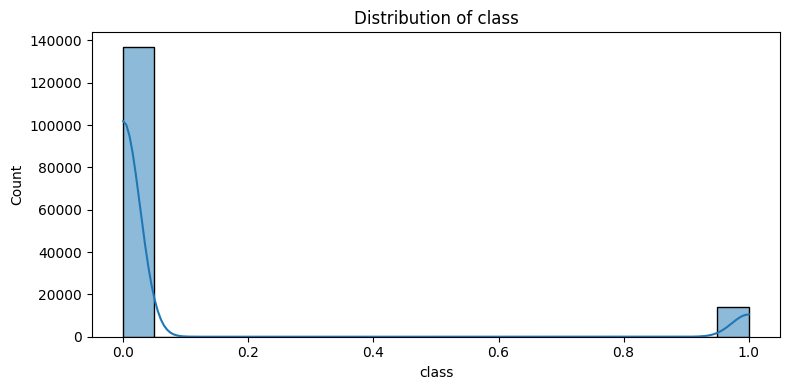

In [30]:
# Analyze class distribution
class_counts = fraud_df_clean['class'].value_counts()
class_percentages = fraud_df_clean['class'].value_counts(normalize=True) * 100

print("Class Distribution:")
print(f"Non-fraud (0): {class_counts[0]} ({class_percentages[0]:.2f}%)")
print(f"Fraud (1): {class_counts[1]} ({class_percentages[1]:.2f}%)")
print(f"Imbalance ratio: {class_counts[0] / class_counts[1]:.1f}:1")

# Visualize class imbalance
plot_univariate_distribution(fraud_df_clean, 'class')


In [31]:
# Convert IP addresses to integers in the fraud data
# First, convert IP addresses from scientific notation to proper IP format
fraud_df_clean['ip_address'] = fraud_df_clean['ip_address'].astype(int).astype(str)
fraud_df_clean['ip_address'] = fraud_df_clean['ip_address'].apply(lambda x: 
    '.'.join([str((int(x) >> (8 * (3 - i))) & 255) for i in range(4)]))

fraud_df_clean = add_ip_integer_column(fraud_df_clean, ip_column='ip_address', new_column='ip_int')

print(f"Added IP integer column. Sample values:")
print(fraud_df_clean[['ip_address', 'ip_int']].head())


Added IP integer column. Sample values:
      ip_address      ip_int
0    43.173.1.96   732758368
1  20.225.83.219   350311387
2  156.64.132.28  2621473820
3  228.234.6.235  3840542443
4  24.197.75.141   415583117


In [32]:
# Check the IP mapping data structure
print("IP mapping data types:")
print(ip_map_df.dtypes)
print("\nIP mapping data sample:")
print(ip_map_df.head())

# The IP range columns should already be integers, but let's verify
print(f"\nIP mapping data shape: {ip_map_df.shape}")
print(f"Countries available: {ip_map_df['country'].nunique()}")


IP mapping data types:
lower_bound_ip_address    float64
upper_bound_ip_address      int64
country                    object
dtype: object

IP mapping data sample:
   lower_bound_ip_address  upper_bound_ip_address    country
0              16777216.0                16777471  Australia
1              16777472.0                16777727      China
2              16777728.0                16778239      China
3              16778240.0                16779263  Australia
4              16779264.0                16781311      China

IP mapping data shape: (138846, 3)
Countries available: 235


In [33]:
# Merge fraud data with country information
print("Merging with country data...")
fraud_df_clean = merge_ip_to_country(fraud_df_clean, ip_map_df)

print(f"Countries found: {fraud_df_clean['country'].nunique()}")
print("\nTop 10 countries by transaction count:")
print(fraud_df_clean['country'].value_counts().head(10))


Merging with country data...
Countries found: 182

Top 10 countries by transaction count:
country
United States        58049
Unknown              21966
China                12038
Japan                 7306
United Kingdom        4490
Korea Republic of     4162
Germany               3646
France                3161
Canada                2975
Brazil                2961
Name: count, dtype: int64


In [34]:
# Add time-based features
fraud_df_clean = add_time_features(fraud_df_clean, 
                                 purchase_time_col='purchase_time', 
                                 signup_time_col='signup_time')

print("Time-based features added:")
print(fraud_df_clean[['purchase_time', 'signup_time', 'hour_of_day', 'day_of_week', 'time_since_signup']].head())


Time-based features added:
        purchase_time         signup_time  hour_of_day  day_of_week  \
0 2015-04-18 02:47:11 2015-02-24 22:55:49            2            5   
1 2015-06-08 01:38:54 2015-06-07 20:39:50            1            0   
2 2015-01-01 18:52:45 2015-01-01 18:52:44           18            3   
3 2015-05-04 13:54:50 2015-04-28 21:13:25           13            0   
4 2015-09-09 18:40:53 2015-07-21 07:09:52           18            2   

   time_since_signup  
0        1251.856111  
1           4.984444  
2           0.000278  
3         136.690278  
4        1211.516944  


In [35]:
# Add transaction frequency features
fraud_df_clean = add_transaction_frequency(fraud_df_clean, group_col='user_id', freq_col='user_txn_count')
fraud_df_clean = add_transaction_frequency(fraud_df_clean, group_col='device_id', freq_col='device_txn_count')

print("Transaction frequency features added:")
print(fraud_df_clean[['user_id', 'device_id', 'user_txn_count', 'device_txn_count']].head())


Transaction frequency features added:
   user_id      device_id  user_txn_count  device_txn_count
0    22058  QVPSPJUOCKZAR               1                 1
1   333320  EOGFQPIZPYXFZ               1                 1
2     1359  YSSKYOSJHPPLJ               1                12
3   150084  ATGTXKYKUDUQN               1                 1
4   221365  NAUITBZFJKHWW               1                 1


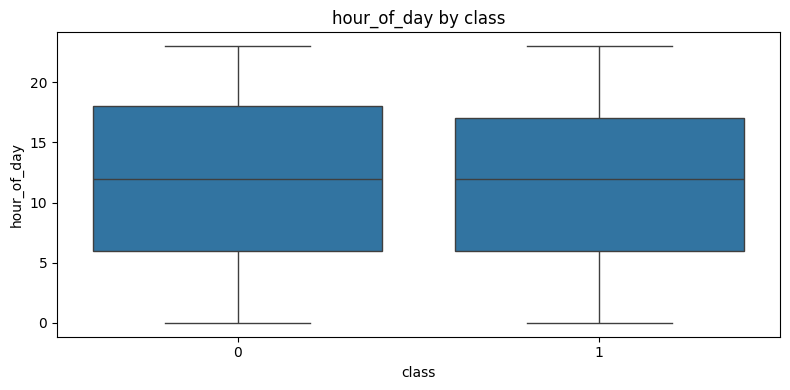

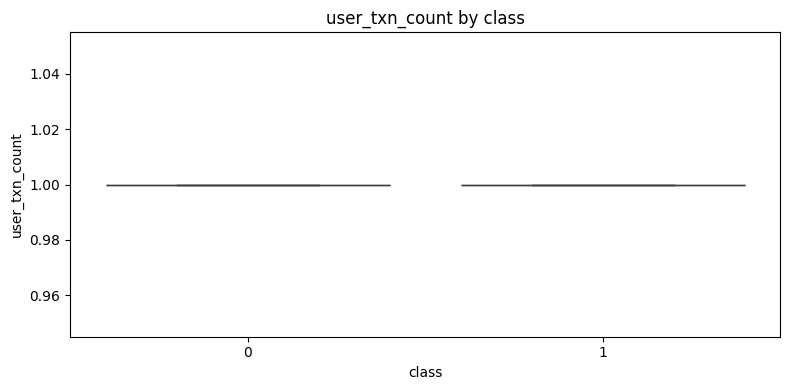

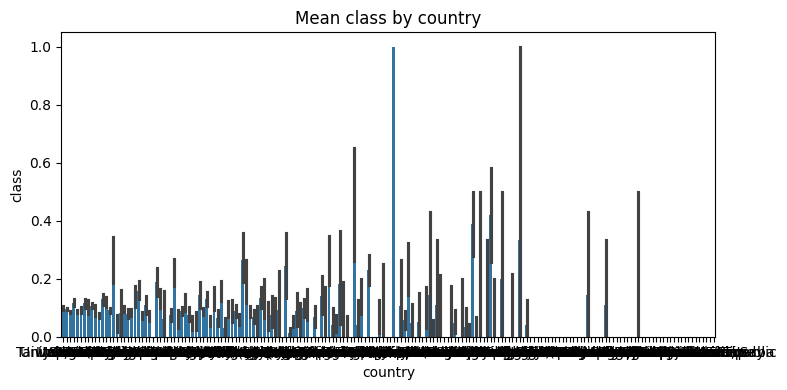

In [36]:
# Visualize some of the new features
plot_bivariate_relationship(fraud_df_clean, 'hour_of_day', 'class')
plot_bivariate_relationship(fraud_df_clean, 'user_txn_count', 'class')
plot_bivariate_relationship(fraud_df_clean, 'country', 'class')


In [57]:
# Define features and target
# TODO: Adjust based on which columns you want to include as features
feature_columns = [
    'user_id', 'purchase_value', 'age', 'ip_int',
    'hour_of_day', 'day_of_week', 'time_since_signup', 
    'user_txn_count', 'device_txn_count',
    'browser', 'source', 'sex', 'country'
]

# Remove any columns that don't exist in your data
available_features = [col for col in feature_columns if col in fraud_df_clean.columns]
print(f"Using features: {available_features}")

X = fraud_df_clean[available_features].copy()
y = fraud_df_clean['class'].copy()

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")


Using features: ['user_id', 'purchase_value', 'age', 'ip_int', 'hour_of_day', 'day_of_week', 'time_since_signup', 'user_txn_count', 'device_txn_count', 'browser', 'source', 'sex', 'country']
Feature matrix shape: (151112, 13)
Target vector shape: (151112,)


In [58]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Training class distribution: {y_train.value_counts().to_dict()}")
print(f"Test class distribution: {y_test.value_counts().to_dict()}")


Training set: 120889 samples
Test set: 30223 samples
Training class distribution: {0: 109568, 1: 11321}
Test class distribution: {0: 27393, 1: 2830}


In [59]:
# Identify categorical and numerical columns
categorical_cols = ['browser', 'source', 'sex', 'country']  # Removed device_id - too many unique values
# Remove any that don't exist in your data
categorical_cols = [col for col in categorical_cols if col in X_train.columns]

numerical_cols = [col for col in X_train.columns if col not in categorical_cols]

print(f"Categorical columns: {categorical_cols}")
print(f"Numerical columns: {numerical_cols}")

# Check cardinality of categorical columns to avoid memory issues
print("\nCardinality check:")
for col in categorical_cols:
    unique_count = X_train[col].nunique()
    print(f"  {col}: {unique_count} unique values")
    if unique_count > 100:
        print(f"    ⚠️  HIGH CARDINALITY! Will group rare categories to top 50.")


Categorical columns: ['browser', 'source', 'sex', 'country']
Numerical columns: ['user_id', 'purchase_value', 'age', 'ip_int', 'hour_of_day', 'day_of_week', 'time_since_signup', 'user_txn_count', 'device_txn_count']

Cardinality check:
  browser: 5 unique values
  source: 3 unique values
  sex: 2 unique values
  country: 180 unique values
    ⚠️  HIGH CARDINALITY! Will group rare categories to top 50.


In [ ]:
# FIXED: One-hot encode categorical features - Always ensure variables are defined
if categorical_cols:
    print("Encoding categorical features with cardinality limit...")
    X_train_encoded, X_test_encoded = encode_categorical_features(
        X_train, X_test, categorical_cols, max_categories=50
    )
else:
    print("No categorical columns to encode.")
    X_train_encoded, X_test_encoded = X_train.copy(), X_test.copy()

print(f"After encoding - Training shape: {X_train_encoded.shape}")
print(f"After encoding - Test shape: {X_test_encoded.shape}")


Encoding categorical features with cardinality limit...
After encoding - Training shape: (120889, 199)
After encoding - Test shape: (30223, 199)


In [62]:
# Handle class imbalance (ONLY on training data!)
print("Handling class imbalance with SMOTE...")

try:
    X_train_res, y_train_res = handle_class_imbalance(X_train_encoded, y_train, method='smote')
    
    print(f"✅ SMOTE completed successfully!")
    print(f"Original training set: {X_train_encoded.shape[0]} samples")
    print(f"After SMOTE: {X_train_res.shape[0]} samples")
    print(f"New class distribution: {pd.Series(y_train_res).value_counts().to_dict()}")
    
except ValueError as e:
    print(f"❌ SMOTE failed with error: {e}")
    print("\nDEBUG INFO:")
    print(f"X_train_encoded shape: {X_train_encoded.shape}")
    print(f"X_train_encoded dtypes: {X_train_encoded.dtypes.value_counts()}")
    
    # Check for problematic columns
    for col in X_train_encoded.columns:
        if X_train_encoded[col].dtype == 'object':
            print(f"Non-numeric column found: {col}")
            print(f"Sample values: {X_train_encoded[col].head(5).tolist()}")
    
    print("\nTrying alternative approach: using random undersampling instead...")
    X_train_res, y_train_res = handle_class_imbalance(X_train_encoded, y_train, method='undersample')
    print(f"✅ Undersampling completed!")
    print(f"After undersampling: {X_train_res.shape[0]} samples")
    print(f"New class distribution: {pd.Series(y_train_res).value_counts().to_dict()}")


Handling class imbalance with SMOTE...
✅ SMOTE completed successfully!
Original training set: 120889 samples
After SMOTE: 219136 samples
New class distribution: {0: 109568, 1: 109568}


In [63]:
# Handle class imbalance (ONLY on training data!)
print("Handling class imbalance with SMOTE...")
X_train_res, y_train_res = handle_class_imbalance(X_train_encoded, y_train, method='smote')

print(f"Original training set: {X_train_encoded.shape[0]} samples")
print(f"After SMOTE: {X_train_res.shape[0]} samples")
print(f"New class distribution: {pd.Series(y_train_res).value_counts().to_dict()}")


Handling class imbalance with SMOTE...


Original training set: 120889 samples
After SMOTE: 219136 samples
New class distribution: {0: 109568, 1: 109568}


In [64]:
# Scale numerical features
print("Scaling features...")
X_train_final, X_test_final = scale_features(
    X_train_res, X_test_encoded, method='standard'
)

# Convert back to DataFrames for easier handling
X_train_final = pd.DataFrame(X_train_final, columns=X_train_res.columns)
X_test_final = pd.DataFrame(X_test_final, columns=X_test_encoded.columns)

print(f"Final training shape: {X_train_final.shape}")
print(f"Final test shape: {X_test_final.shape}")


Scaling features...
Final training shape: (219136, 199)
Final test shape: (30223, 199)


In [65]:
print("=== PREPROCESSING COMPLETE ===")
print(f"Final training features shape: {X_train_final.shape}")
print(f"Final test features shape: {X_test_final.shape}")
print(f"Training target shape: {len(y_train_res)}")
print(f"Test target shape: {len(y_test)}")
print(f"Number of features: {X_train_final.shape[1]}")
print(f"Training class balance: {pd.Series(y_train_res).value_counts().to_dict()}")

print("\nFeature columns:")
print(X_train_final.columns.tolist())

print("\n✅ Data is ready for Task 2: Model Building and Training!")


=== PREPROCESSING COMPLETE ===
Final training features shape: (219136, 199)
Final test features shape: (30223, 199)
Training target shape: 219136
Test target shape: 30223
Number of features: 199
Training class balance: {0: 109568, 1: 109568}

Feature columns:
['user_id', 'purchase_value', 'age', 'ip_int', 'hour_of_day', 'day_of_week', 'time_since_signup', 'user_txn_count', 'device_txn_count', 'browser_Chrome', 'browser_FireFox', 'browser_IE', 'browser_Opera', 'browser_Safari', 'source_Ads', 'source_Direct', 'source_SEO', 'sex_F', 'sex_M', 'country_Afghanistan', 'country_Albania', 'country_Algeria', 'country_Angola', 'country_Antigua and Barbuda', 'country_Argentina', 'country_Armenia', 'country_Australia', 'country_Austria', 'country_Azerbaijan', 'country_Bahamas', 'country_Bahrain', 'country_Bangladesh', 'country_Barbados', 'country_Belarus', 'country_Belgium', 'country_Belize', 'country_Benin', 'country_Bermuda', 'country_Bhutan', 'country_Bolivia', 'country_Bosnia and Herzegowina', 

In [66]:
#Uncomment to save processed data
X_train_final.to_csv('../data/processed/X_train_processed.csv', index=False)
X_test_final.to_csv('../data/processed/X_test_processed.csv', index=False)
pd.Series(y_train_res).to_csv('../data/processed/y_train_processed.csv', index=False)
pd.Series(y_test).to_csv('../data/processed/y_test_processed.csv', index=False)
print("Processed data saved to data/processed/")


Processed data saved to data/processed/
